In [15]:
import pandas as pd

df = pd.read_csv('/content/synthetic_credit_consumers.csv')
df.head()


,CustomerID,Name,Age,CreditScore,TransactionAmount,LoanAmount,LatePayments
0,e11fa949-37eb-4999-bdbd-5d3c401b80fa,Chloe Cooke,43.0,592.0,5014.0,2678.0,2.0
1,416c9fe3-d43b-45a5-978e-aa8a4311b5c9,Curtis Nguyen,36.0,337.0,2265.0,1354.0,5.0
2,b1b99342-704e-449f-90f7-2c5287518e1f,Joseph Gonzalez,47.0,529.0,2975.0,4134.0,2.0
3,67a301f6-c1ad-49be-92f6-36e6201c82ac,Anthony Webster,32.0,810.0,4140.0,2108.0,2.0
4,a90ff7c6-c1ac-4fe5-896f-dfb1685b7a3b,Felicia Blair,63.0,394.0,6080.0,4282.0,0.0


In [3]:
o=df.isna().sum()
o

CustomerID           0
Name                 0
Age                  0
CreditScore          0
TransactionAmount    0
LoanAmount           0
LatePayments         0
dtype: int64

идеальный датасет, без пропусков

In [16]:
print(df.dtypes)

CustomerID            object
Name                  object
Age                  float64
CreditScore          float64
TransactionAmount    float64
LoanAmount           float64
LatePayments         float64
dtype: object


наш датасет числовой

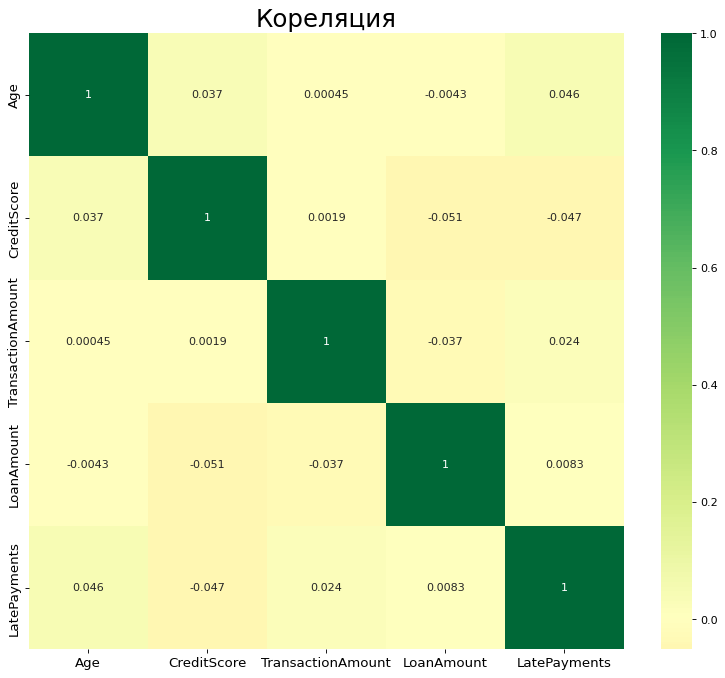

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df.drop('Name', axis=1)
df = df.drop('CustomerID', axis=1)
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Кореляция', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

кореляция нормальная

Text(0.5, 1.0, 'LatePayments')

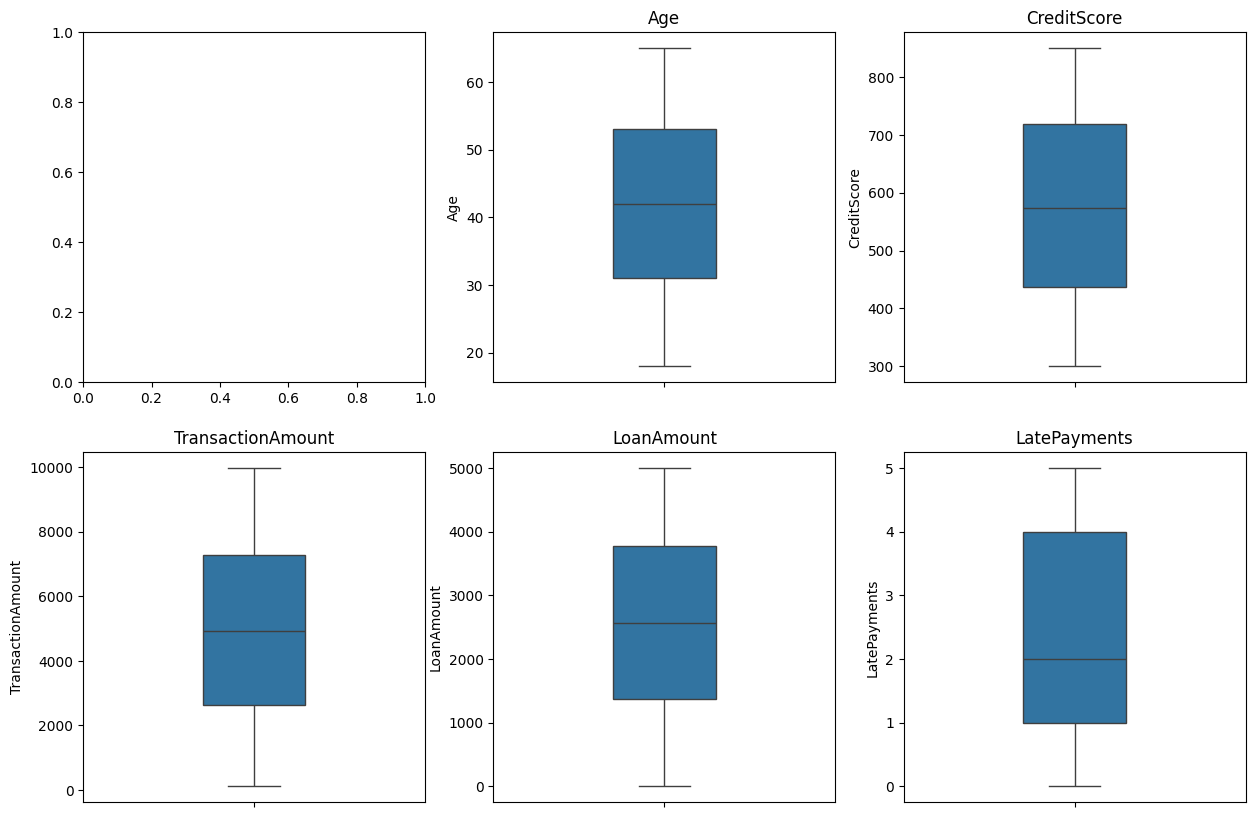

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

sns.boxplot(df['Age'], ax=axes[0][1], width=0.3).set_title('Age')
sns.boxplot(df['CreditScore'], ax=axes[0][2], width=0.3).set_title('CreditScore')
sns.boxplot(df['TransactionAmount'], ax=axes[1][0], width=0.3).set_title('TransactionAmount')
sns.boxplot(df['LoanAmount'], ax=axes[1][1], width=0.3).set_title('LoanAmount')
sns.boxplot(df['LatePayments'], ax=axes[1][2], width=0.3).set_title('LatePayments')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

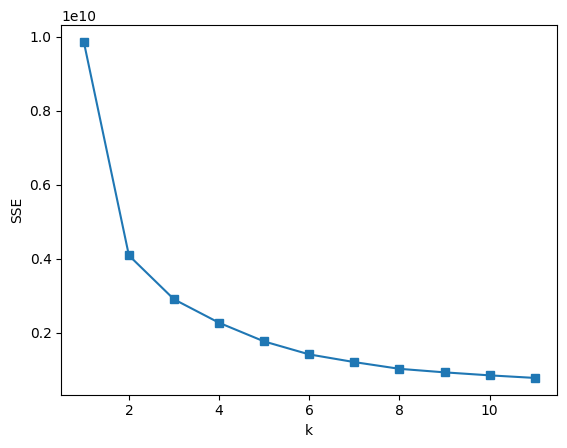

In [19]:
# метод локтя
from sklearn.cluster import KMeans
X = df
df

SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,12):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1,12), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

Оптимально 7 кластеров

In [20]:
X = df

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred

kmeans.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 0, 3, 4, 6, 2, 1, 2, 4, 4, 0, 2, 4, 6, 1, 1, 1, 0, 2, 3, 3, 0,
       6, 1, 6, 5, 1, 1, 1, 5, 5, 5, 0, 2, 1, 3, 1, 2, 0, 6, 6, 2, 0, 4,
       6, 3, 0, 4, 5, 3, 6, 2, 6, 0, 4, 0, 5, 6, 3, 6, 1, 3, 2, 5, 5, 5,
       5, 6, 3, 4, 3, 1, 3, 4, 1, 0, 0, 2, 3, 6, 1, 4, 3, 3, 1, 2, 4, 4,
       4, 1, 2, 2, 0, 2, 2, 6, 5, 0, 4, 3, 6, 3, 6, 6, 5, 2, 2, 6, 0, 6,
       4, 3, 3, 1, 3, 0, 3, 1, 0, 1, 0, 1, 4, 5, 4, 4, 5, 3, 5, 2, 0, 2,
       6, 6, 5, 2, 2, 0, 3, 6, 2, 2, 3, 2, 3, 5, 3, 5, 6, 3, 0, 6, 1, 1,
       2, 0, 3, 2, 3, 6, 4, 6, 1, 2, 1, 4, 0, 1, 5, 2, 2, 0, 6, 4, 3, 2,
       6, 4, 6, 0, 3, 0, 1, 6, 2, 6, 0, 6, 4, 0, 0, 6, 4, 0, 3, 6, 1, 4,
       0, 0, 6, 0, 3, 6, 2, 5, 3, 0, 2, 0, 5, 3, 6, 5, 6, 6, 6, 4, 2, 0,
       2, 1, 6, 0, 1, 6, 5, 5, 4, 2, 6, 2, 6, 6, 6, 4, 4, 1, 6, 3, 1, 5,
       2, 4, 4, 3, 0, 1, 0, 1, 3, 4, 0, 4, 0, 2, 0, 1, 0, 3, 3, 5, 3, 6,
       5, 0, 3, 3, 0, 4, 6, 3, 1, 5, 1, 1, 3, 4, 5, 3, 3, 1, 3, 5, 2, 2,
       5, 6, 3, 1, 6, 4, 4, 6, 4, 6, 2, 3, 4, 5, 1,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3891418307823123
For n_clusters = 5 The average silhouette_score is : 0.37966933355231486


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3713451440476357


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.37213410213585724


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.3696597703381634


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.3584886527053301


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.3564885425960611


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11 The average silhouette_score is : 0.3405470493437054


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average silhouette_score is : 0.3603979925777726


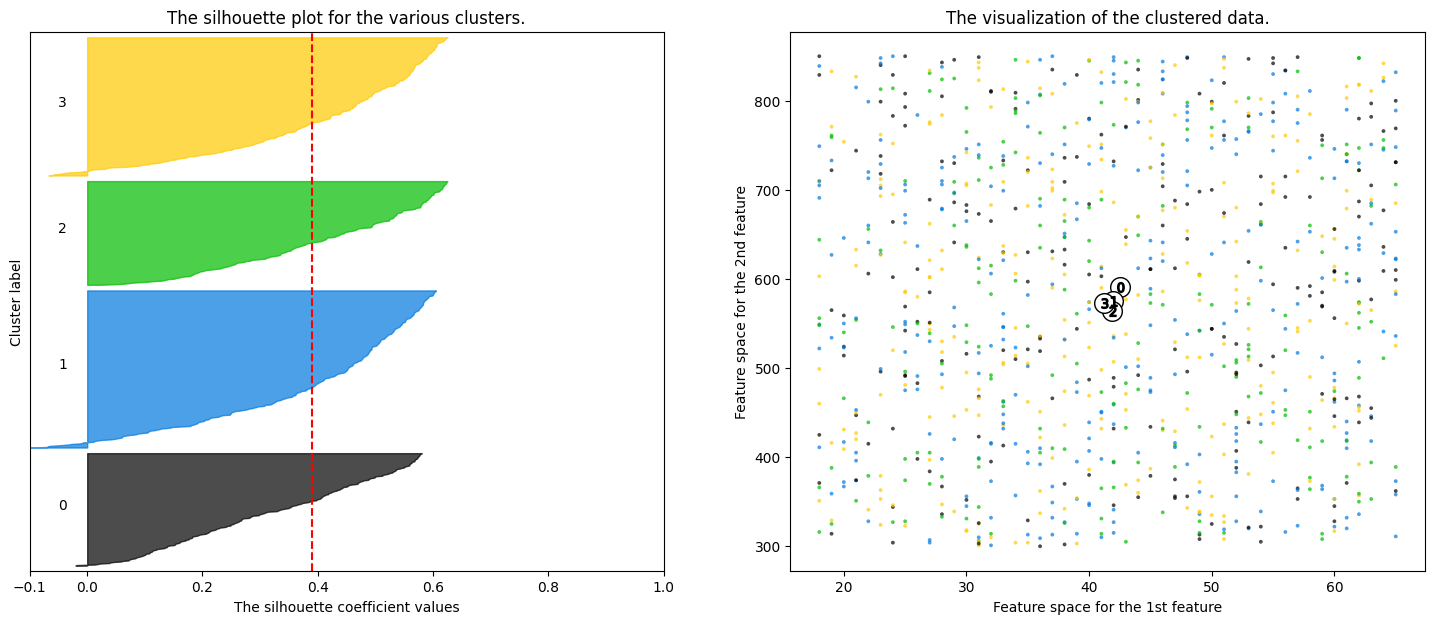

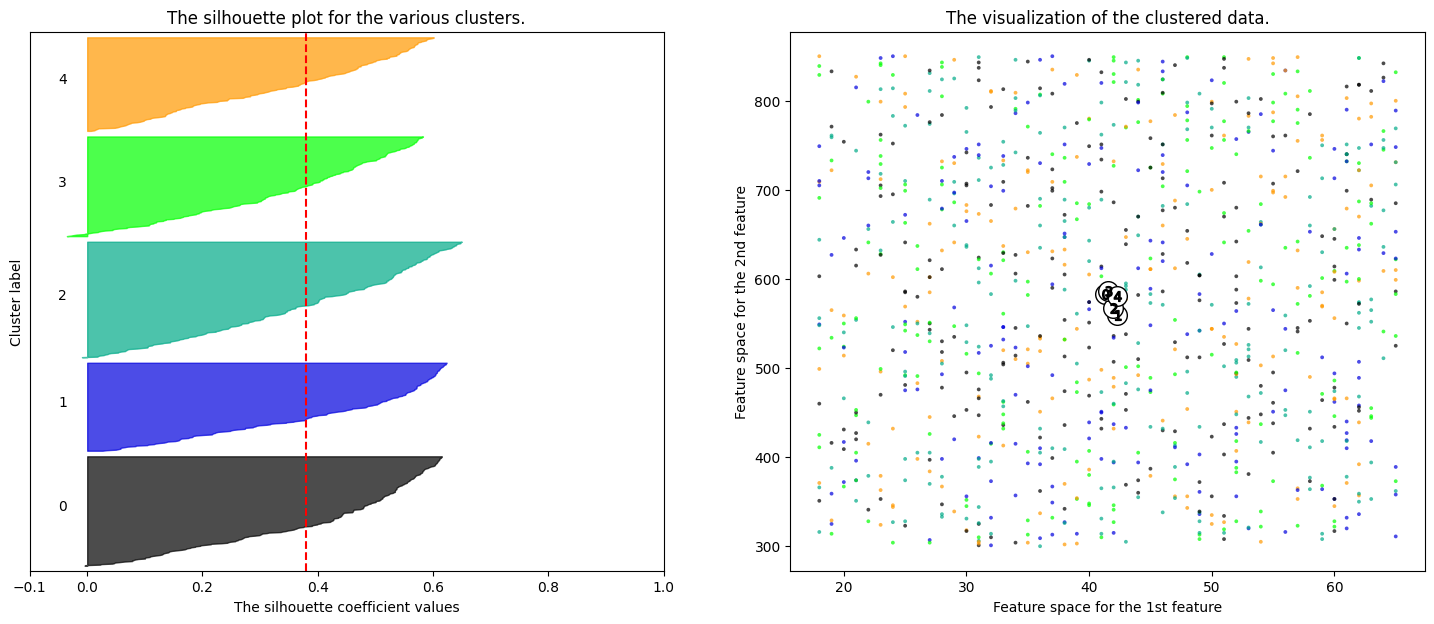

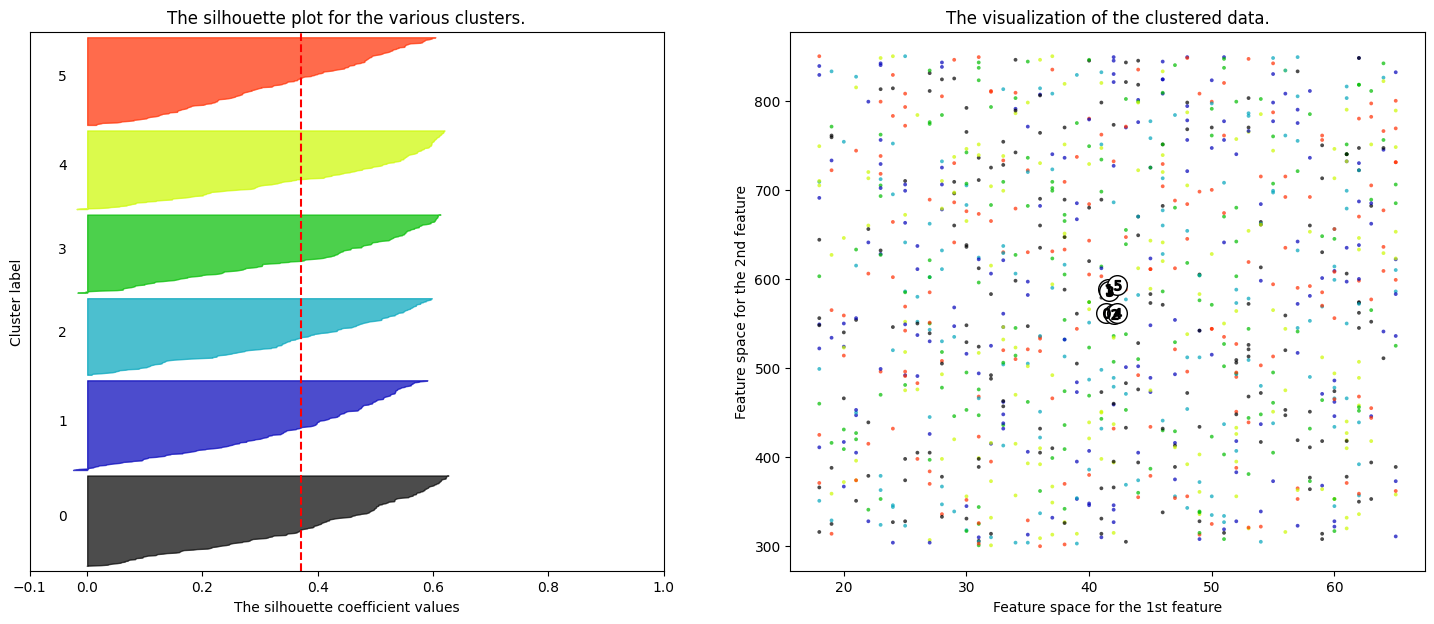

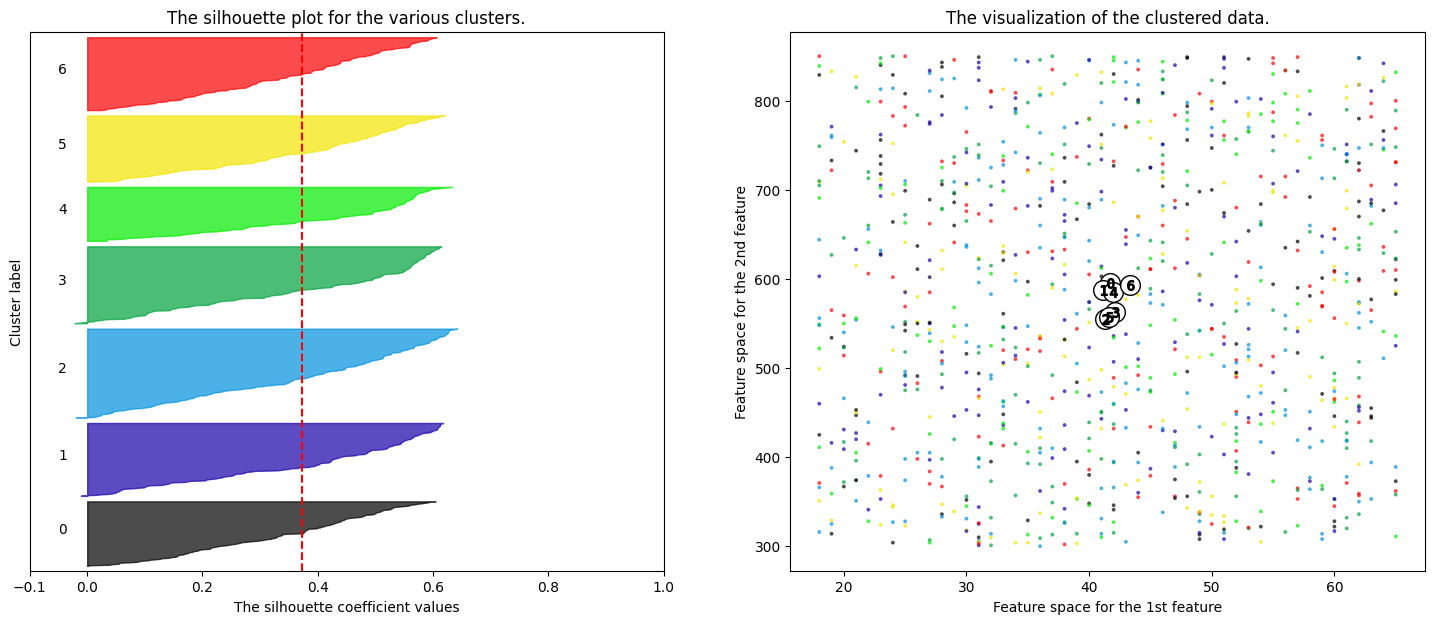

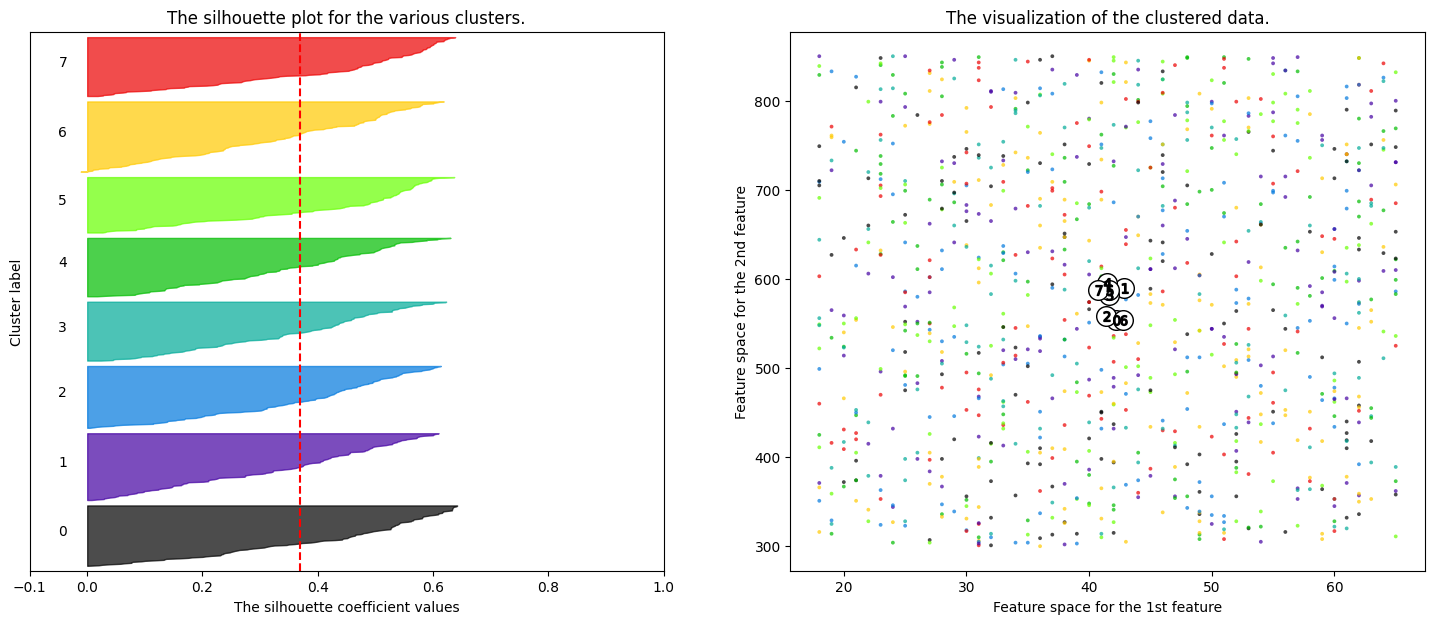

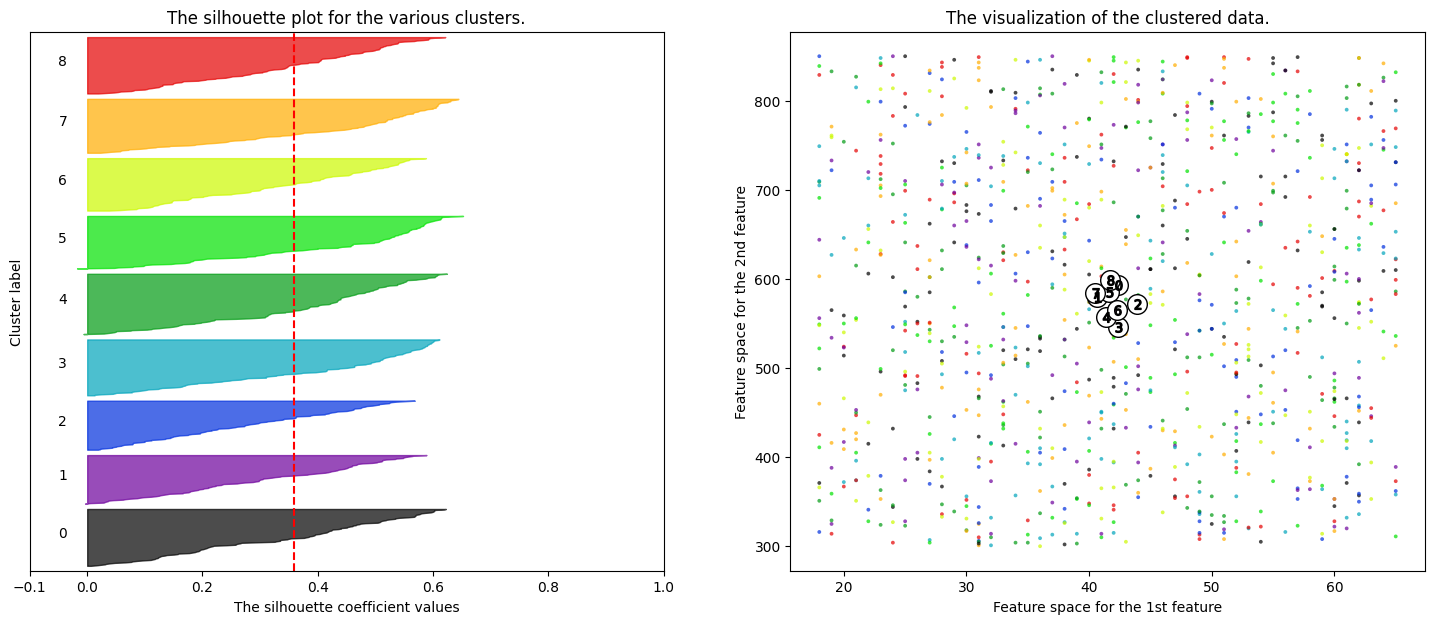

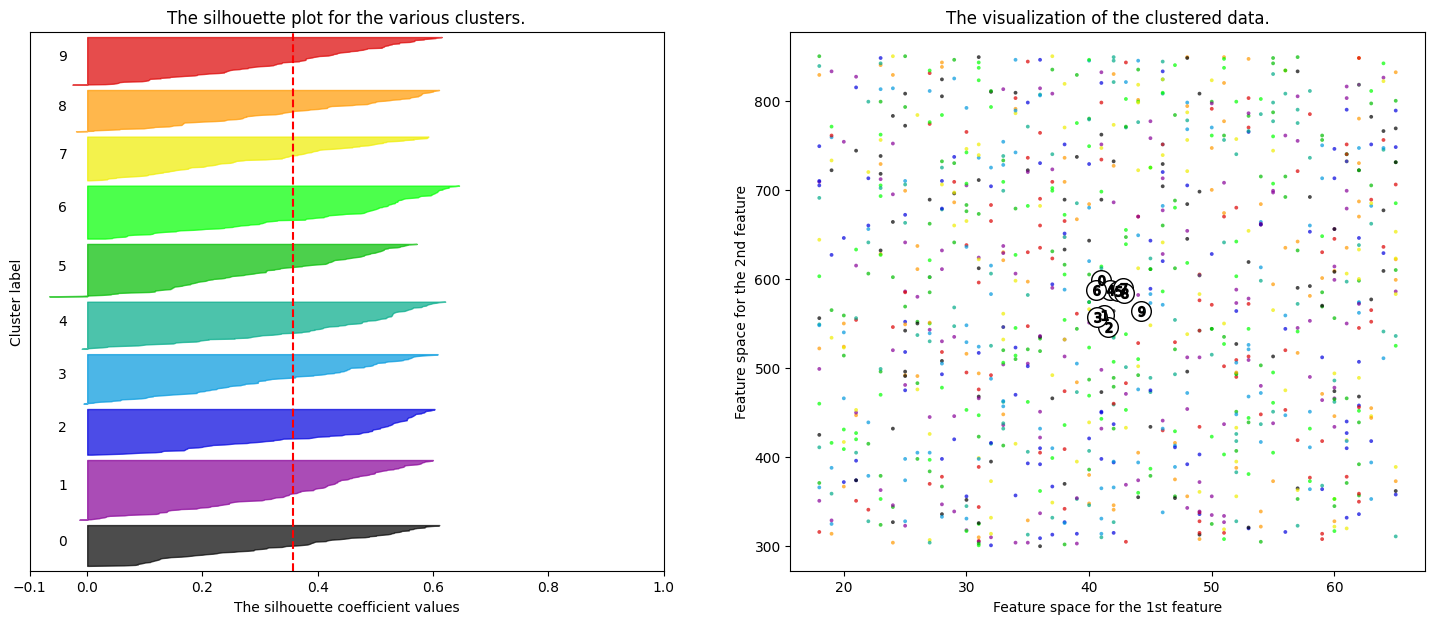

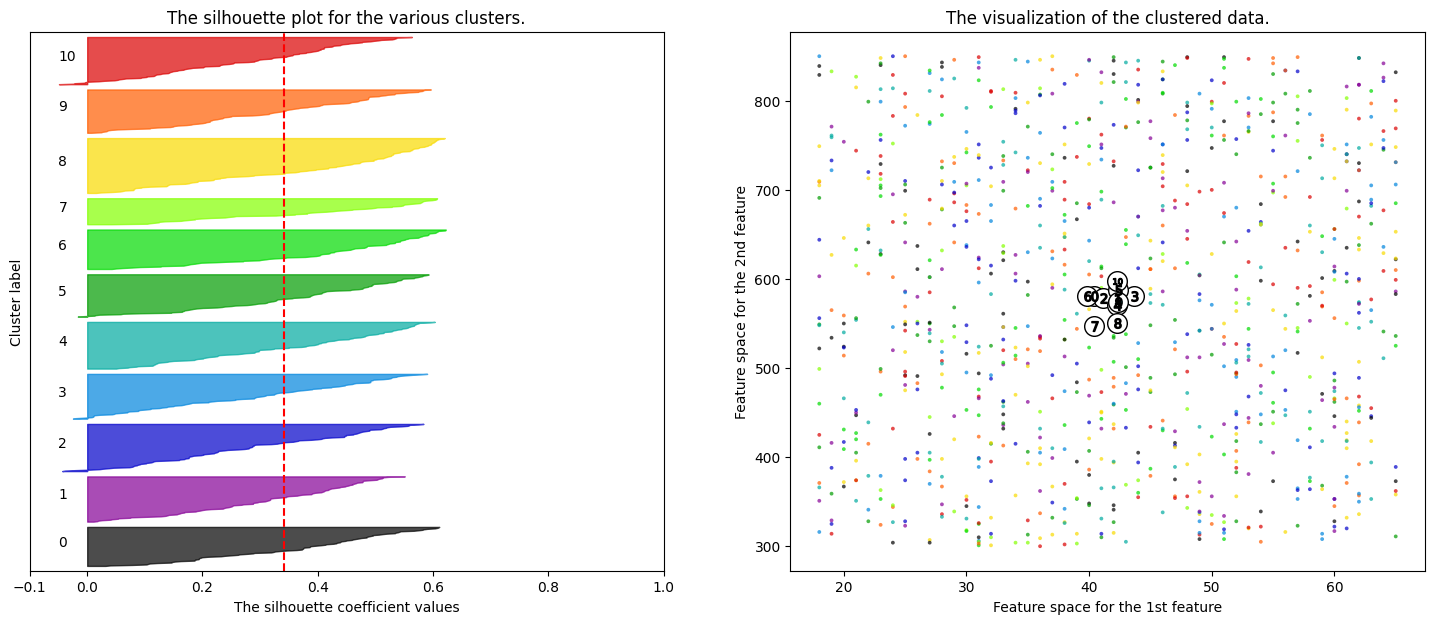

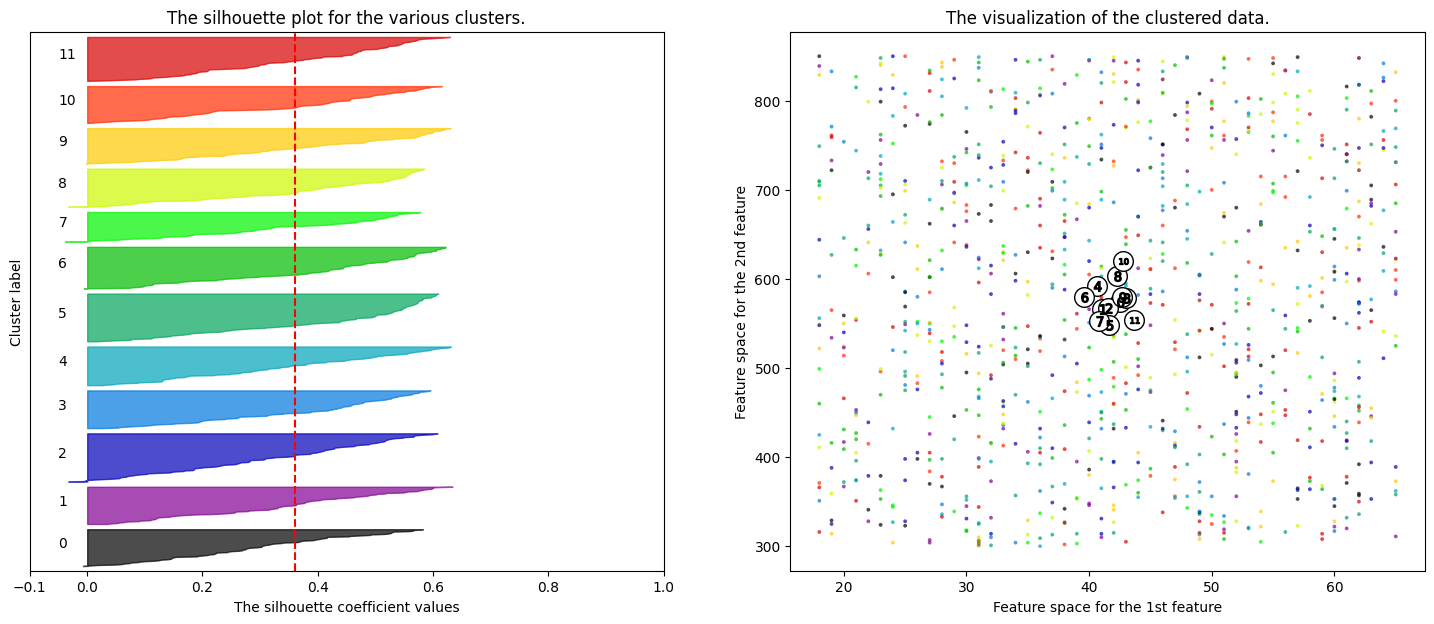

In [21]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(4, 13)

for n_clusters in range_n_clusters:
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Первый подсюжет — это график силуэта
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X.values)

    silhouette_avg = silhouette_score(df.values, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df.values, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df.values[:, 0], df.values[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k"
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

plt.show()

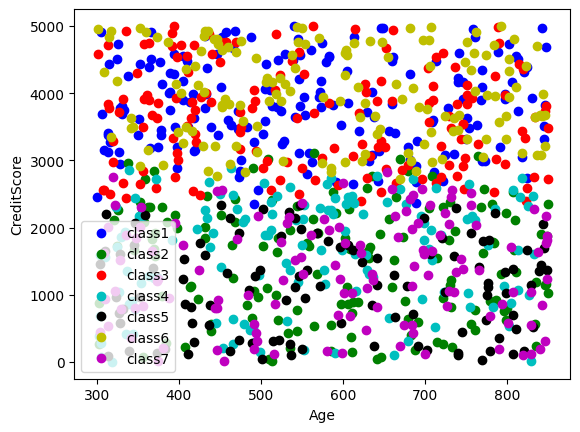

In [ ]:
import matplotlib.pyplot as plt

# X[строки, столбцы]
# plt.plot(x,y)

plt.plot(X[X['cluster']==0]['CreditScore'], X[X['cluster']==0]['L
oanAmount'], 'bo', label='class1')
plt.plot(X[X['cluster']==1]['CreditScore'], X[X['cluster']==1]['LoanAmount'], 'go', label='class2')
plt.plot(X[X['cluster']==2]['CreditScore'], X[X['cluster']==2]['LoanAmount'], 'ro', label='class3')
plt.plot(X[X['cluster']==3]['CreditScore'], X[X['cluster']==3]['LoanAmount'], 'co', label='class4')
plt.plot(X[X['cluster']==4]['CreditScore'], X[X['cluster']==4]['LoanAmount'], 'ko', label='class5')
plt.plot(X[X['cluster']==5]['CreditScore'], X[X['cluster']==5]['LoanAmount'], 'yo', label='class6')
plt.plot(X[X['cluster']==6]['CreditScore'], X[X['cluster']==6]['LoanAmount'], 'mo', label='class7')





plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.legend(loc=0)
plt.show()

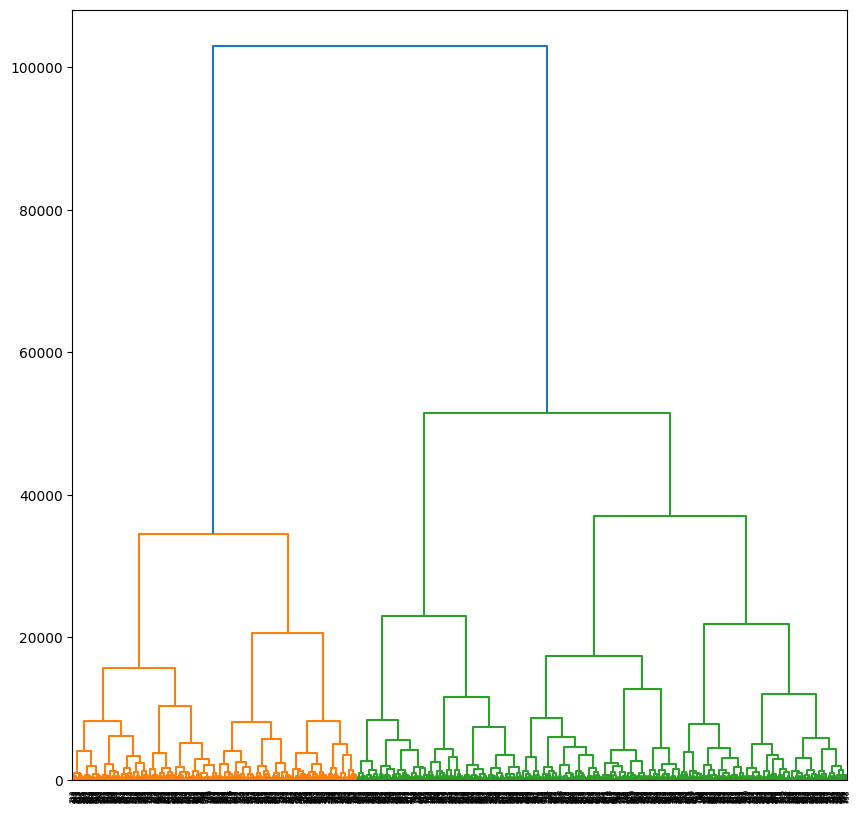

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# матрица расстояний
Z = linkage(X, 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Создаем модель
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', distance_threshold = 10)

y_hc = hc.fit_predict(X)
# hc.fit(X)
# hc.predict(X)

y_hc
# scipy - 1,2,3
# sklearn - 0,1,2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 3, 1, 3, 1, 2, 4, 2, 3, 1, 0, 2, 3, 1, 4, 4, 4, 0, 2, 0, 1, 0,
       1, 4, 1, 4, 4, 4, 4, 2, 2, 2, 0, 4, 4, 1, 4, 1, 0, 1, 1, 3, 0, 3,
       1, 0, 0, 3, 2, 0, 3, 3, 1, 0, 3, 0, 2, 1, 0, 1, 4, 0, 2, 2, 4, 2,
       2, 1, 0, 3, 0, 4, 0, 3, 4, 3, 0, 2, 1, 1, 4, 3, 1, 0, 1, 4, 3, 3,
       3, 4, 1, 2, 0, 3, 2, 1, 2, 3, 3, 0, 1, 0, 1, 1, 2, 2, 2, 3, 0, 1,
       1, 1, 0, 4, 0, 0, 1, 4, 0, 4, 3, 4, 3, 2, 3, 3, 2, 1, 4, 3, 0, 2,
       1, 1, 2, 2, 2, 3, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 4, 4,
       2, 0, 1, 4, 0, 1, 3, 1, 4, 2, 4, 3, 0, 4, 4, 2, 2, 0, 1, 3, 1, 2,
       1, 3, 1, 0, 1, 0, 4, 1, 2, 1, 0, 1, 3, 0, 0, 1, 3, 0, 0, 1, 4, 3,
       0, 0, 1, 0, 0, 1, 2, 4, 0, 3, 2, 0, 4, 0, 1, 4, 1, 1, 1, 3, 2, 0,
       4, 4, 3, 0, 4, 1, 2, 4, 3, 2, 1, 2, 1, 1, 1, 3, 3, 4, 1, 1, 4, 4,
       3, 3, 3, 1, 0, 1, 0, 4, 0, 3, 0, 3, 3, 2, 0, 4, 3, 0, 0, 2, 1, 1,
       2, 0, 1, 1, 0, 3, 1, 0, 4, 4, 4, 4, 0, 3, 2, 0, 0, 4, 0, 2, 2, 3,
       2, 3, 0, 4, 1, 3, 3, 1, 3, 1, 3, 0, 3, 2, 4,

In [ ]:
df['pred_sklearn'] = y_hc
df

,Age,CreditScore,TransactionAmount,LoanAmount,LatePayments,pred_sklearn
0,43.0,592.0,5014.0,2678.0,2.0,3
1,36.0,337.0,2265.0,1354.0,5.0,3
2,47.0,529.0,2975.0,4134.0,2.0,1
3,32.0,810.0,4140.0,2108.0,2.0,3
4,63.0,394.0,6080.0,4282.0,0.0,1
...,...,...,...,...,...,...
995,27.0,776.0,1715.0,3977.0,1.0,0
996,61.0,740.0,4528.0,4229.0,5.0,1
997,41.0,432.0,563.0,2266.0,0.0,0
998,43.0,821.0,4576.0,4315.0,2.0,1


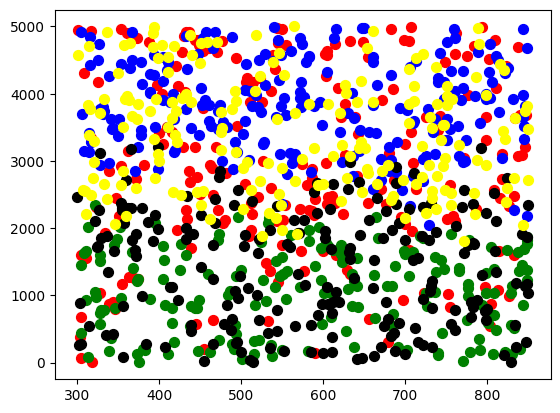

In [ ]:
plt.scatter(X.loc[y_hc==0, 'CreditScore'], X.loc[y_hc==0, 'LoanAmount'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'CreditScore'], X.loc[y_hc==1, 'LoanAmount'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'CreditScore'], X.loc[y_hc==2, 'LoanAmount'], s=50, marker='o', color='green')
plt.scatter(X.loc[y_hc==3, 'CreditScore'], X.loc[y_hc==3, 'LoanAmount'], s=50, marker='o', color='black')
plt.scatter(X.loc[y_hc==4, 'CreditScore'], X.loc[y_hc==4, 'LoanAmount'], s=50, marker='o', color='yellow')


plt.show()